# Imports 

In [50]:
import pandas as pd
import numpy as np

# import matplotlib.pyplot and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os
from math import ceil

from scipy import stats

import warnings

# Data Set Information:
**customer_id** - Unique identifier for each customer.

**customer_region** - Geographic region where the customer is located.

**customer_age** - Age of the customer.

**vendor_count** - Number of unique vendors the customer has ordered from.

**product_count** - Total number of products the customer has ordered.

**is_chain** - Indicates whether the customer’s order was from a chain restaurant.

**first_order** - Number of days from the start of the dataset when the customer first placed an order.

**last_order** - Number of days from the start of the dataset when the customer most recently placed an order.

**last_promo** - The category of the promotion or discount most recently used by the customer.

**payment_method** - Method most recently used by the customer to pay for their orders.

**CUI_American, CUI_Asian, CUI_Chinese, CUI_Italian, etc.** - The amount in monetary units spent by the customer from the indicated type of cuisine.

**DOW_0toDOW_6** - Number of orders placed on each day of the week (0 =Sunday, 6 =Saturday).

**HR_0toHR_23** - Number of orders placed during each hour of the day (0 =midnight, 23 = 11 PM).

In [51]:
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv', sep=',')
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,28.88,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.0,0.0,0.0,0.0,0.0,0.0,17.86,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,14.57,40.87,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [53]:
df.isna().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

In [54]:
df.set_index('customer_id', inplace= True)

In [55]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31101.000000,31828.000000,31828.000000,31828.000000,31722.000000,31828.00000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,30664.0,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000,31828.000000
mean,27.508376,3.102645,5.668248,2.819467,28.462329,63.66674,4.878717,9.959460,2.296773,0.802162,0.768990,1.431904,0.884069,0.951931,1.630242,3.234723,2.993057,0.712701,3.002839,3.906958,0.841754,0.555894,0.567771,0.590801,0.619297,0.677957,0.652947,0.704254,0.0,0.053726,0.063183,0.118386,0.101609,0.081846,0.069718,0.076756,0.131928,0.234259,0.329615,0.378315,0.314252,0.236333,0.215408,0.276957,0.356321,0.391102,0.337125,0.245853,0.142799,0.071227,0.048228,0.045212
std,7.164141,2.772111,6.957506,3.977932,24.101334,23.23167,11.652854,23.571343,8.470691,6.432826,3.660007,8.196175,5.257256,5.835936,7.443219,11.253846,10.182749,4.540379,9.775722,15.522462,4.435322,1.013460,1.044383,1.045672,1.069931,1.088231,1.069820,1.167516,0.0,0.316398,0.351663,0.497201,0.437411,0.358645,0.329540,0.377581,0.635979,0.725483,0.890932,0.960065,0.842833,0.637145,0.598255,0.738367,0.874181,0.944256,0.894446,0.795864,0.586876,0.348773,0.298032,0.282163
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.00000,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.

### Remarks
- HR_0 only has 0 values, thus **drop the feature**
- HR_11 & HR_17 representing 11am and 5pm, respectively, are the hours of the day when, on average, consumers order more
- HR_22 to HR_1 representing 10pm to 1am, are the hours of the day when, on average, consumers order less<br/>
<br/>
- DOW_4 & DOW_6 representing Thursday and Saturday, are the days of the week when, on average, consumers order more
- DOW_0 & DOW_1 representing Sunday and Mondauy, are the days of the week when, on average, consumers order less<br/>
<br/>
**Missing values**: The variables "customer_age", "first_order" and " HR_0" have missing values<br/>
For all rows with missing values in "first_order", the corresponding value in the feature "last_order" is 0, meaning **the customer didn't place an order during the data collection period**.


In [57]:
# group the data by similarity
orders_per_hour= df.loc[:, 'HR_0':'HR_23']

dawn = sum(df.loc[:, 'HR_0':'HR_6'].sum())
morning= sum(df.loc[:, 'HR_7':'HR_12'].sum())
afternoon = sum(df.loc[:, 'HR_13':'HR_18'].sum())
night = sum(df.loc[:, 'HR_19':'HR_23'].sum())

orders_per_moment_of_day = [dawn, morning, afternoon, night]


orders_per_dow = df.loc[:, 'DOW_0':'DOW_6']
orders_per_dow_sum = orders_per_dow.sum()

amount_spent_per_cuisine = df.loc[:, 'CUI_American':'CUI_Thai']
amount_spent_per_cuisine_sum = amount_spent_per_cuisine.sum()

In [58]:
# split data metric and non metric
df_non_metric = df.select_dtypes(include=['object'])
df_metric = df.select_dtypes(include=['int64', 'float64'])

# Exploratory Data Analysis

## Metric Data

In [59]:
# split data into metric and non-metric
metric_features = df.columns.drop(df_non_metric.columns).drop(orders_per_dow).drop(amount_spent_per_cuisine).drop(orders_per_hour).to_list()

print(metric_features)

['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order']


## Metric Data Histogram

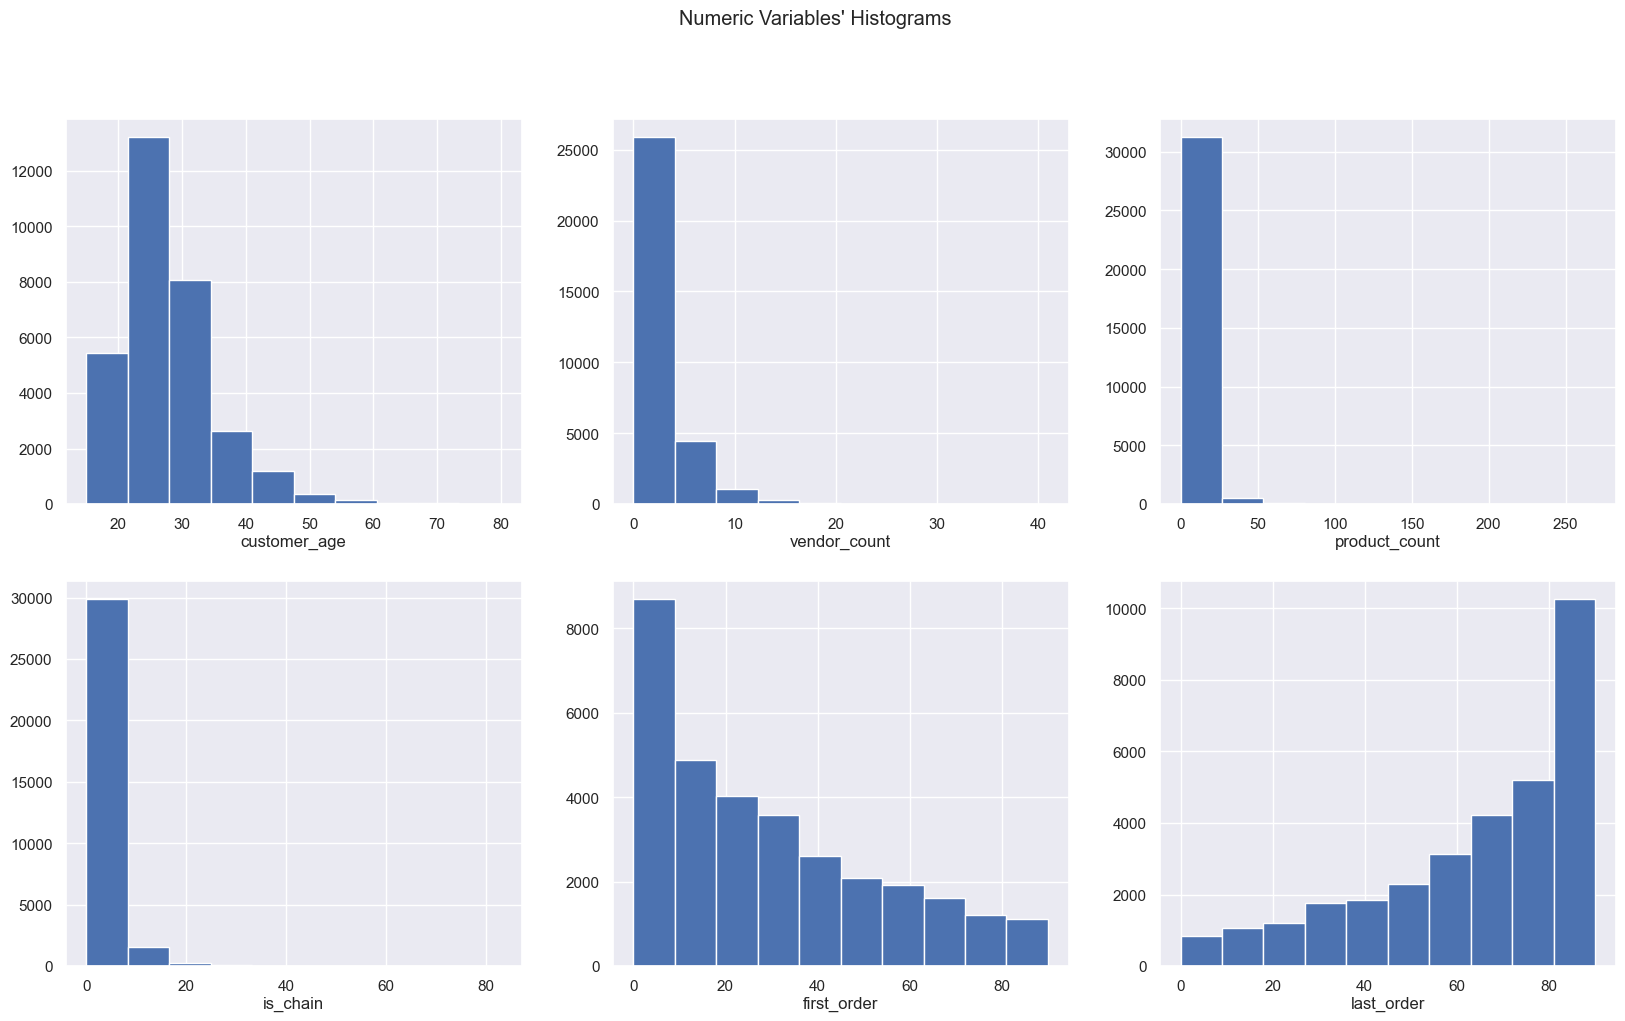

In [60]:
sp_rows = 2
sp_cols = 3

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method - creates one list with all the axes
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)

title = "Numeric Variables' Histograms"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    os.makedirs(os.path.join('..', 'figures', 'eda'))
    
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

plt.show()

### Histogram - Remarks

- By visualizing their histograms, the features *first_order* and *last_order* seem to be **correlated**, due to their plots' symmetry. <br/>
- The features *vendor_count*,*product_count* and *is_chain* seem to have **outliers that limit the visualization** of their distribution.<br/> 
- The feature *customer_age* might have some less accentuated outliers, but seems to have a **right-skewed distribution** - meaning that customers show a tendency to young adults.

## Metric Data Boxplot

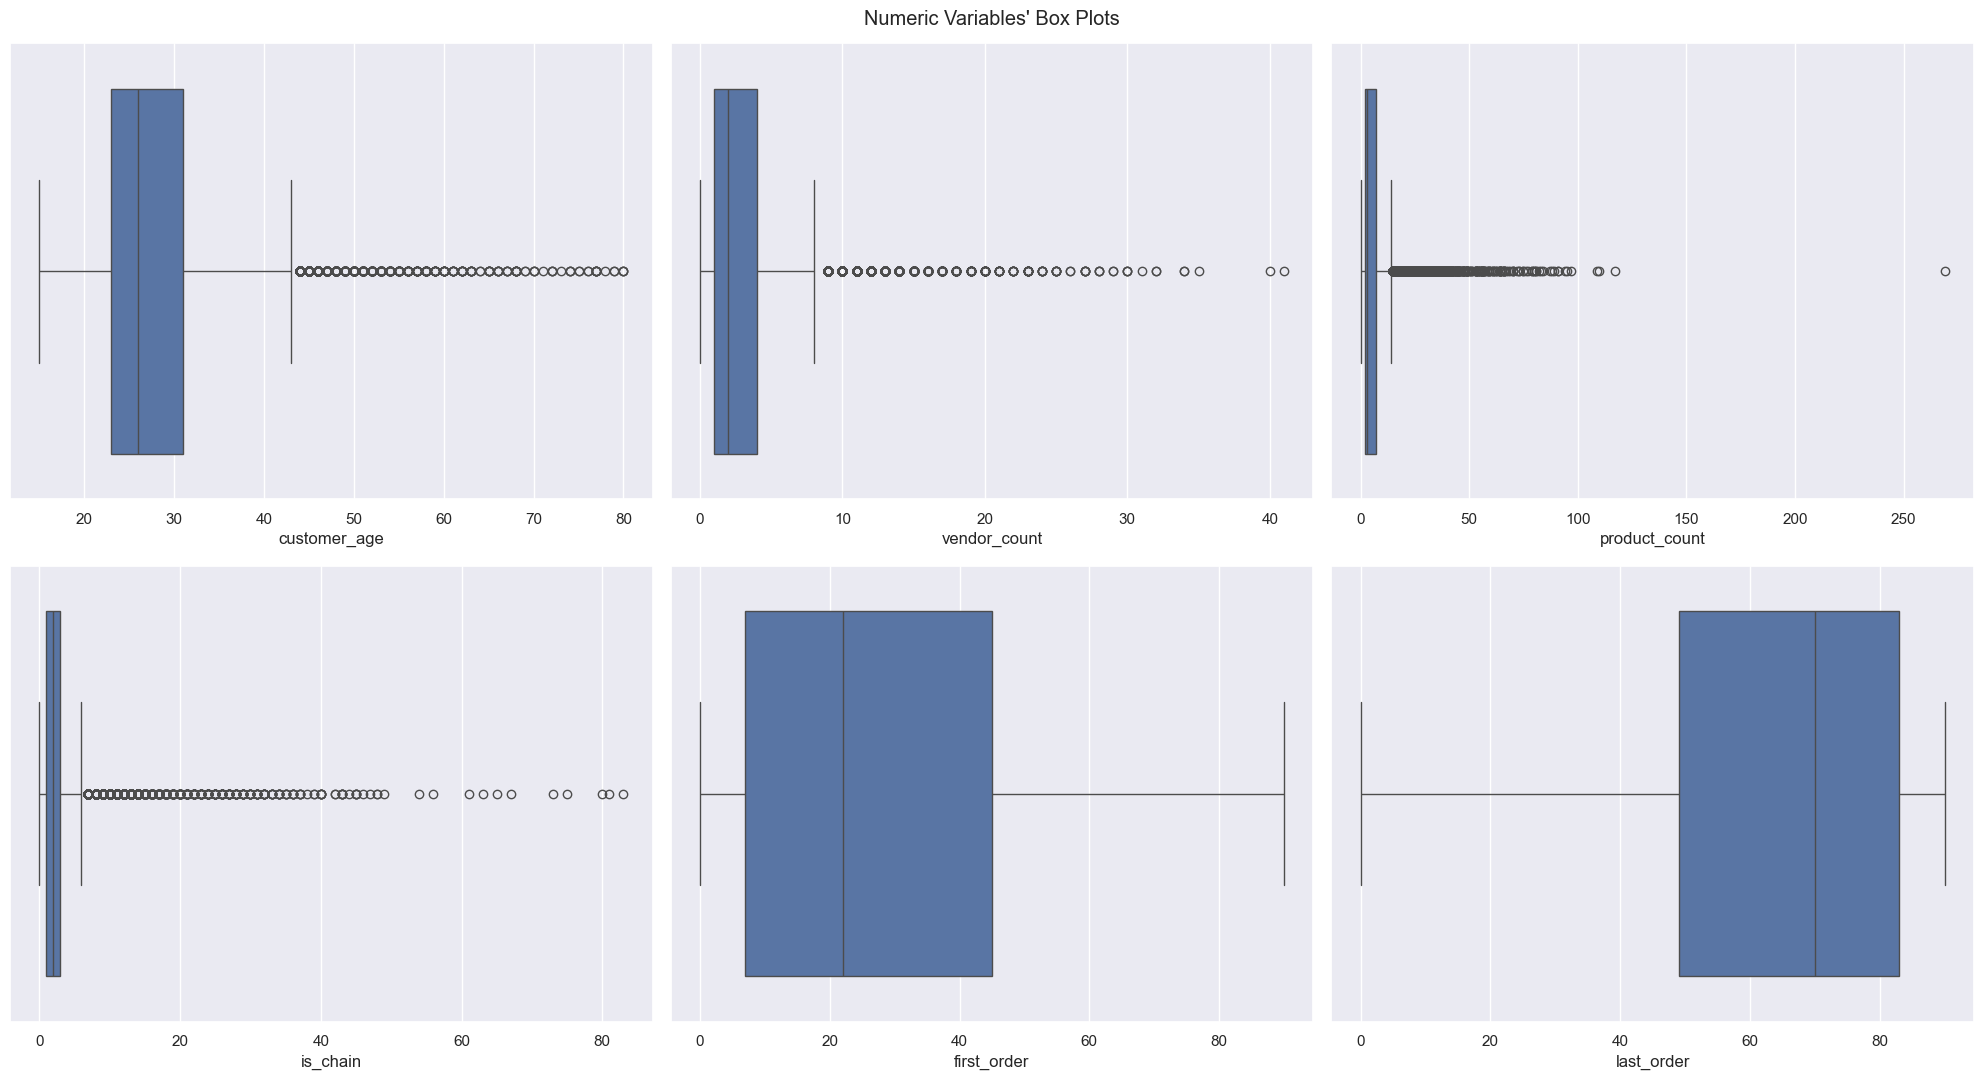

In [ ]:
sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows)


fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )


for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)


plt.show()

### Boxplot - Remarks

- Once again, the features *first_order* and *last_order* have highly symmetrical plots, which might indicate **correlation** between them. <br/>
- As suspected, the features *vendor_count*,*product_count* and *is_chain* have a **elevated number of outliers**, that should be dealt with in order to visualize the features distribution. <br/>
- (WHAT SHOULD WE DO WITH THE OUTLIERS OF CUSTOMER AGE- by taking them off we might be biasing the data)

In [ ]:
df['is_chain'].unique()

array([ 1,  2,  0,  3,  5,  4,  7, 12,  6, 23,  8, 11, 20, 14,  9, 10, 16,
       15, 13, 25, 17, 27, 30, 32, 24, 18, 26, 28, 22, 40, 31, 39, 21, 37,
       19, 33, 65, 38, 29, 45, 47, 73, 81, 56, 35, 46, 67, 44, 61, 34, 36,
       49, 83, 75, 43, 42, 48, 63, 54, 80])

In [ ]:
# check for customers with no orders
no_orders = df.loc[:, 'DOW_0':'DOW_6'].sum(axis=1) == 0
no_orders = df[no_orders]
len(no_orders)

138

- 138 customers have not ordered in this period

## Metric Data Correlation Matrix

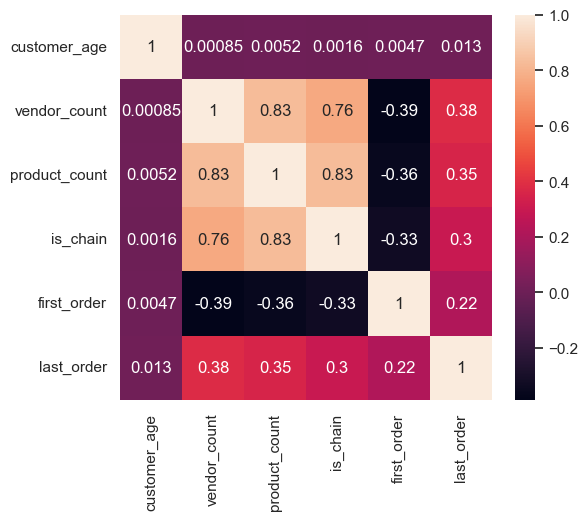

In [ ]:
ig = plt.figure(figsize=(6, 5))

corr = df[metric_features].corr(method="pearson")

sns.heatmap(data=corr, annot=True)


plt.show()

### Correlation Matrix - Remarks
- The feature *product_count* is highly correlated to *vendor_count* and *is_chain*, thus it is a good candidate to be dropped from the dataset. <br/>
- Depending on the redundancy treeshold considered, *vendour_count* and *is_chain* can be also considered highly correlated. If the treeshold considered is bellow to 0.76, one of the named features would be dropped from the dataset.

## Days of the Week 

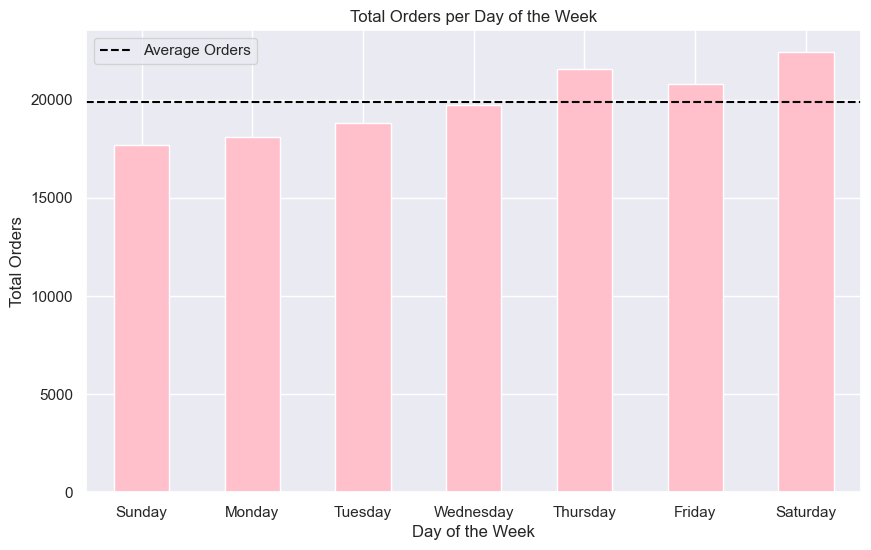

In [ ]:
average_orders_dow = orders_per_dow_sum.mean()
list_day_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize=(10, 6))
orders_per_dow_sum.plot(kind='bar', color = 'pink')
plt.xticks(ticks=range(len(list_day_of_week)), labels=list_day_of_week, rotation=0)
plt.axhline(y=average_orders_dow, color='black', linestyle='--', label='Average Orders')
plt.title('Total Orders per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Orders')
plt.xticks(rotation=0)
plt.legend()
plt.show()



### Days of the Week - Remarks
- The total number of orders per day of the week does not have a high disparity, as we can observe in the graph.
- We decided to compare it to the mean, approximately 19902 orders per day of the week. This comparison allows us to identify days that fall below it and those that meet or exceed it.
- For example, from Thursday to Saturday, the number of orders exceeds the average, while the rest of the days fall below it. Unexpectedly, Sunday has the lowest order count of the week.

## Hours of the day

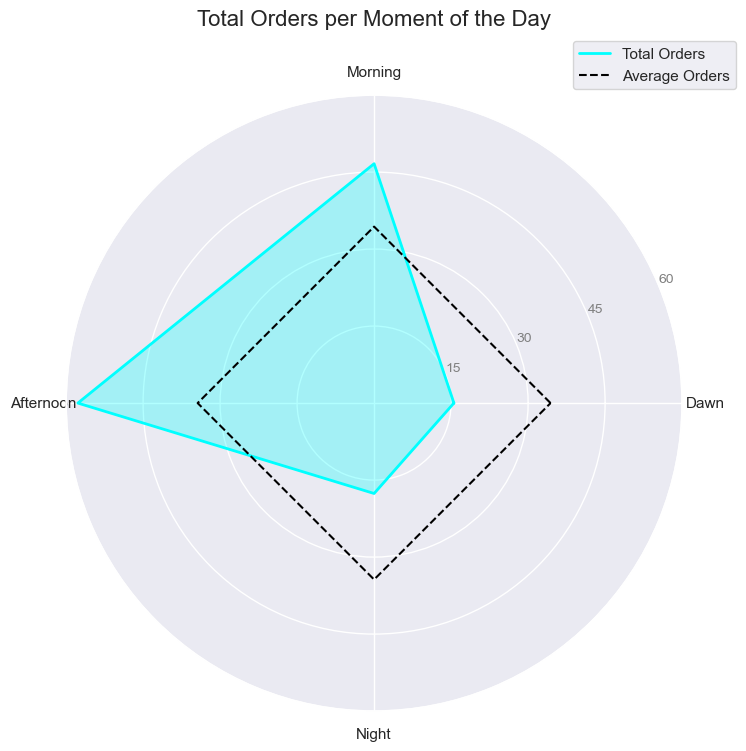

In [ ]:
moments_of_day = ['Dawn', 'Morning', 'Afternoon', 'Night']
orders_per_moment_of_day = [15.547, 46.632, 57.712, 17.611] 
average_orders_moment = sum(orders_per_moment_of_day) / len(orders_per_moment_of_day)

angles = np.linspace(0, 2 * np.pi, len(moments_of_day), endpoint=False).tolist()
orders_per_moment_of_day += orders_per_moment_of_day[:1] 
angles += angles[:1] 

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))


ax.plot(angles, orders_per_moment_of_day, color='cyan', linewidth=2, label='Total Orders')
ax.fill(angles, orders_per_moment_of_day, color='cyan', alpha=0.3)


ax.plot(angles, [average_orders_moment] * len(angles), color='black', linestyle='--', label='Average Orders')
ax.set_xticks(angles[:-1])  
ax.set_xticklabels(moments_of_day)  
ax.set_yticks([15, 30, 45, 60])  
ax.set_yticklabels(['15', '30', '45', '60'], color="grey", size=10)  
plt.title('Total Orders per Moment of the Day', size=16, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()


### Moments of the Day - Remarks
- We defined each time segment as follows: Dawn (midnight to 6am), Morning (7am to 12pm), Afternoon (1pm to 6pm), and Night (7pm to 11pm). 
- The values used on the graph are in thousands. 
- Once again, we used the average to compare with the different moments of the day.
- With a mean of the orders is 34440 per moment of the day, both morning (46632 orders) and afternoon (57712 orders) show higher order volumes, with the afternoon having the highest order count. 
- As expected, order counts are low during dawn (15547 orders), however, they are also unexpectedly low at night (17611 orders).

## Cuisines

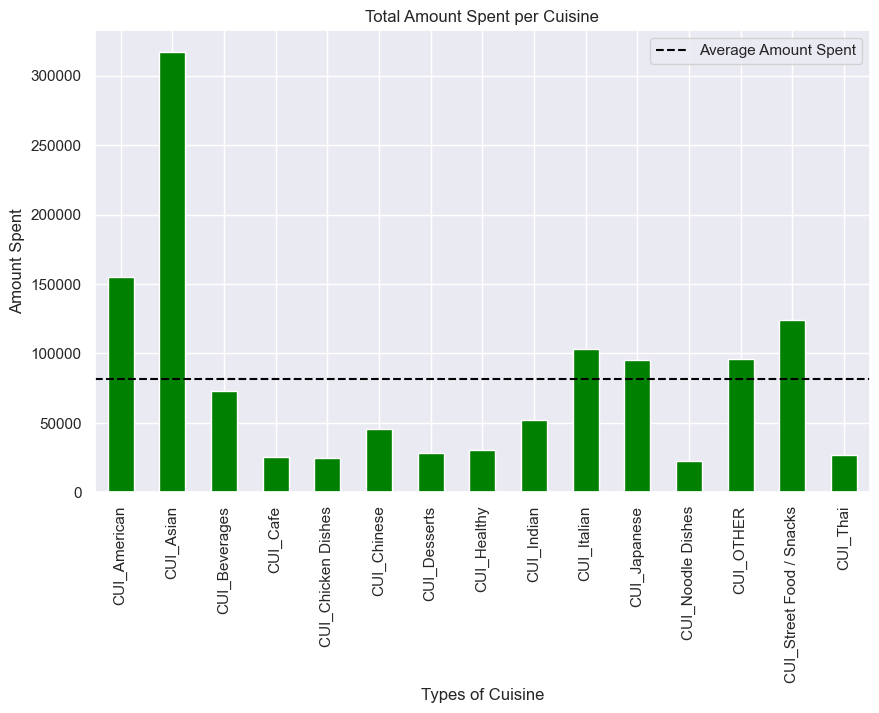

In [ ]:

average_amount_spent_per_cuisine = amount_spent_per_cuisine_sum.mean()

plt.figure(figsize=(10, 6))
amount_spent_per_cuisine_sum.plot(kind='bar', color='green')
plt.axhline(y=average_amount_spent_per_cuisine, color='black', linestyle='--', label='Average Amount Spent')
plt.title('Total Amount Spent per Cuisine')
plt.xlabel('Types of Cuisine')
plt.ylabel('Amount Spent') 
plt.legend()
plt.show()




### Cuisines - Remarks

- On average, the amount in monetary units spent by customers on each type of cuisine is around 81427. However, the graph highlights significant differences in spending among various cuisines.
- Asian food has the largest consumer spending, with a noticeable difference when compared to American food, which comes in second. In terms of consumer spending, Street Food / Snacks comes in third place.
- The cuisines with the lowest customer spending include Cafe, Chicken Dishes, Noodle Dishes, and Thai. The spending for other cuisines is closer to the average.

## Non Metric Data

In [19]:
non_metric_features = df_non_metric.columns.to_list()

In [20]:
df_non_metric.head(5)

,customer_region,last_promo,payment_method
customer_id,,,
1b8f824d5e,2360,DELIVERY,DIGI
5d272b9dcb,8670,DISCOUNT,DIGI
f6d1b2ba63,4660,DISCOUNT,CASH
180c632ed8,4660,DELIVERY,DIGI
4eb37a6705,4660,-,DIGI


In [21]:
df_non_metric = df_non_metric.replace('-', np.nan)

Basic Statistics

In [22]:
cat_stats_list = []

for col in df_non_metric.columns:
    tmp_dict = {
        'column': col,
        'values': df_non_metric[col].unique(),
        'values_count': len(df_non_metric[col].unique()),
        'values_count_nona': int(df_non_metric[col].nunique()),
        'mode': df_non_metric[col].mode().values[0],
        'num_miss': df_non_metric[col].isnull().sum(),
        'pct_miss': (df_non_metric[col].isnull().sum() / len(df_non_metric)).round(2) * 100
    }
    
    cat_stats_list.append(tmp_dict)

ds_cat_stats = pd.DataFrame(cat_stats_list)
ds_cat_stats


,column,values,values_count,values_count_nona,mode,num_miss,pct_miss
0,customer_region,"[2360, 8670, 4660, 2440, nan, 4140, 2490, 8370...",9,8,8670,442,1.0
1,last_promo,"[DELIVERY, DISCOUNT, nan, FREEBIE]",4,3,DELIVERY,16722,53.0
2,payment_method,"[DIGI, CASH, CARD]",3,3,CARD,0,0.0


- customer_region has a lot of different categories (8)
- More than half of last_promo values are missing - probably didn't use any discount
- Is DIGI payment method useful?

Frequency Distribution

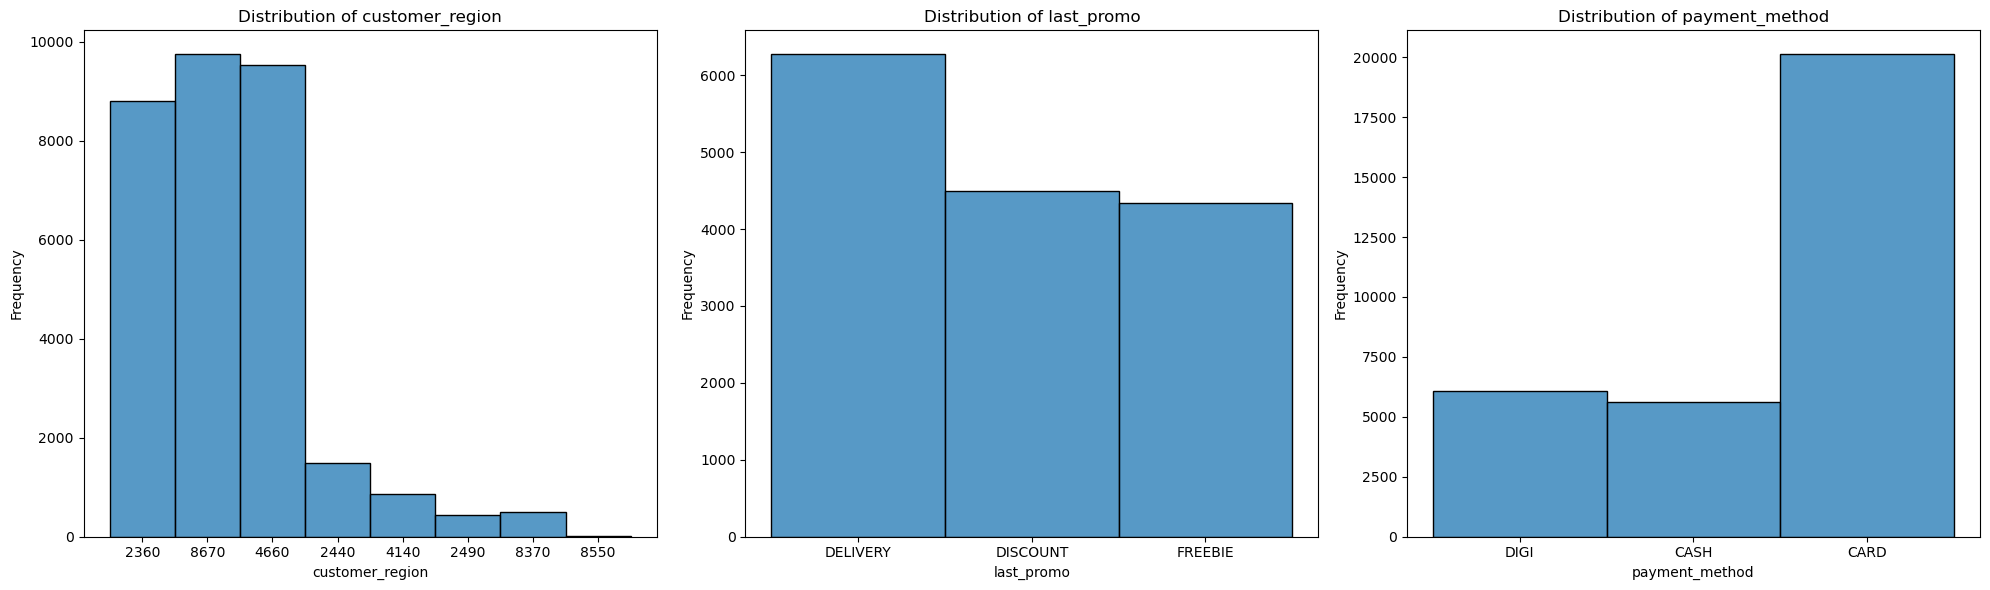

In [40]:
features = df_non_metric.columns 

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for ax, feat in zip(axes, features[:3]):  # Limit to the first 3 features
    sns.histplot(df_non_metric[feat].dropna(), kde=False, ax=ax)
    ax.set_title(f'Distribution of {feat}')
    ax.set_xlabel(feat)
    ax.set_ylabel('Frequency')
    ax.grid(False)  # remove grid

plt.tight_layout()
plt.show()

Remarks:
- Customer Region (left):
There is a heavy concentration in regions 2360, 8670, and 4660, each with around 9,000 to 10,000 entries.
Region 2440 and others have much smaller counts.

- Last Promo (middle):
The majority of entries are missing or unspecified, represented by "-".
"DELIVERY" and "DISCOUNT" promotions have significant counts, with "FREEBIE" being less common.
This distribution may indicate the primary promo types or highlight a need to address missing promo data.

- Payment Method (right):
"CARD" is the most used payment method, followed by "DIGI" (possibly digital) and "CASH."
This distribution suggests that card payments are preferred, while cash is the least common.

## Bivariate and Multivariate Analysis

-> Customer age distribution per region - split customers, which regions ar younger? Average age per region

  customer_region  customer_age
7            8550     25.000000
0               -     27.095455
3            2490     27.210526
1            2360     27.473531
8            8670     27.513953
5            4660     27.529355
2            2440     27.628709
4            4140     27.657074
6            8370     27.708678


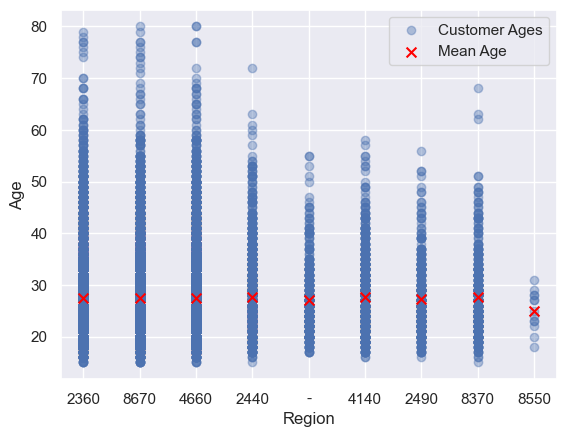

In [ ]:
mean_ages_per_region = df.groupby('customer_region')['customer_age'].mean().reset_index()
print(mean_ages_per_region.sort_values(by='customer_age'))

plt.scatter(df["customer_region"], df["customer_age"], alpha=0.4, label='Customer Ages')
plt.ylabel("Age")
plt.xlabel("Region")

plt.scatter(mean_ages_per_region["customer_region"], mean_ages_per_region["customer_age"], color='red', marker='x', s=50, label='Mean Age')

plt.legend()
plt.show()

-> Vendor count per customer region & Vendor count per customer age - might tell us the customers that are more open to try different restaurants

  customer_region  vendor_count
4            4140      1.803738
6            8370      2.143434
0               -      2.821267
5            4660      2.826078
7            8550      2.846154
8            8670      2.906853
3            2490      3.310811
2            2440      3.698381
1            2360      3.702099


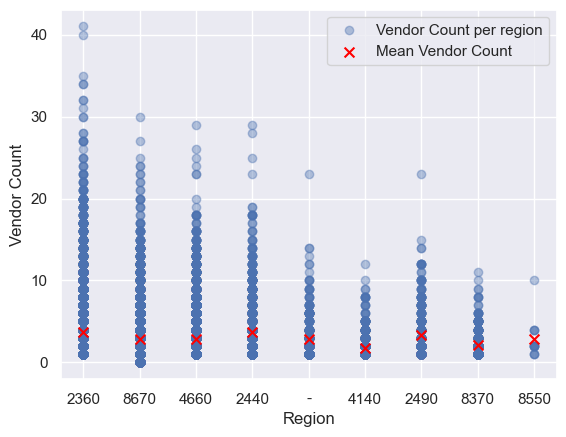

In [ ]:
vendor_per_region = df.groupby('customer_region')['vendor_count'].mean().reset_index()
print(vendor_per_region.sort_values(by='vendor_count'))

plt.scatter(df["customer_region"], df["vendor_count"], alpha=0.4, label='Vendor Count per region')
plt.ylabel("Vendor Count")
plt.xlabel("Region")

plt.scatter(vendor_per_region["customer_region"], vendor_per_region["vendor_count"], color='red', marker='x', s=50, label='Mean Vendor Count')

plt.legend()
plt.show()

### Remarks
- Even though the difference is not immense, the two oldest regions have a tendency to be more conservative in their choices of vendors, not beting as much in variety.
- The regions starting with a '2' (2490, 2440, 2360), are clearly **varying more than others**, might they be close to each other or related in any other way? (the data was collected from three cities, is the initial number representing this?)
- Vendor count seems to be more correlated with region than with age

-> Heatmap of Cuisines by Region  - identify regional cuisine preferences using the frequency or average count of each cuisine type by region

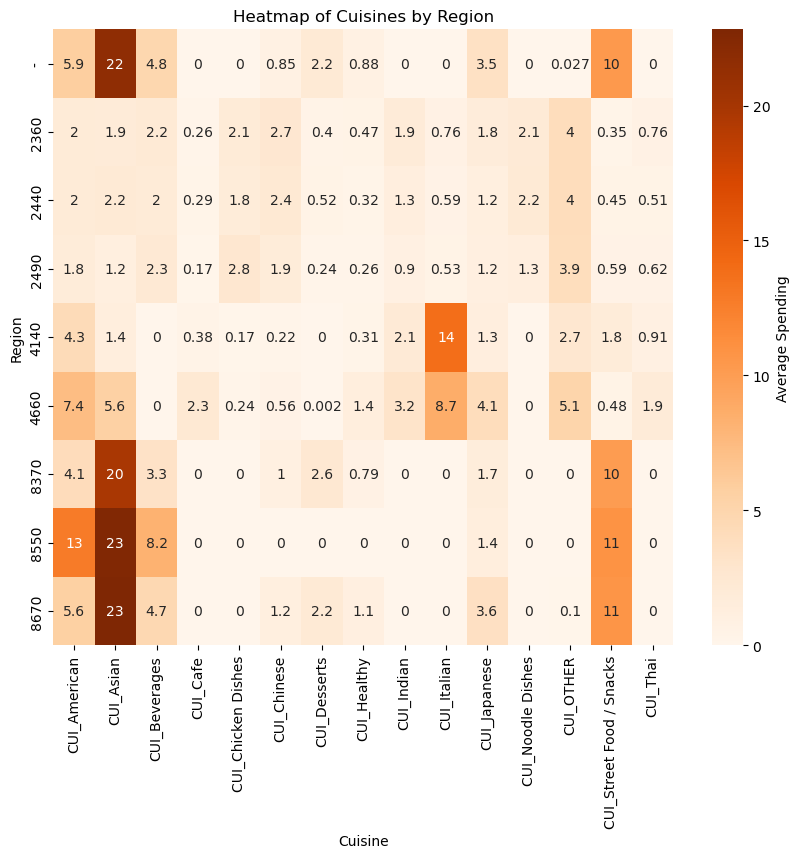

In [ ]:
cuisine_per_region = df.groupby('customer_region')[amount_spent_per_cuisine.columns.tolist()].mean()

plt.figure(figsize=(10, 8))  
sns.heatmap(cuisine_per_region, annot=True, cmap="Oranges", cbar_kws={'label': 'Average Orders'})

plt.title('Heatmap of Cuisines by Region')
plt.xlabel('Cuisine')
plt.ylabel('Region')

plt.show()

### Remarks
- Customers in the **'2' regions** seem to have a lot of options and enjoy diversifying, evidence of this is the fact that all cuisine types have non-null values for average orders but still, this values are **uniformly medium to low**; Despite this behavior, it is still possible to spot preferences, being 'CUI_OTHER' the overall favorite in the 3 regions of the group, followed by 'CUI_Chinese'; On the other side, 'CUI_Cafe', 'CUI_Desserts' and 'CUI_Street Food/Snacks' seem to be the overall least favorites in the region. Yet another remark can be taken from analysing the heatmap - from all 3 regions constituting the '2' regions group, one stands out as the most distinct in tastes, '2490', specially differing from '2360', while '2440' seems to be in between, leaning more towards the second. <br/>
- Customers in the **'4' regions** top 3 cuisines seem to be 'CUI_Italian', 'CUI_American' and 'CUI_OTHER'. Overall, the region '4660' seems to enjoy more diversity. Both 'CUI_Beverages' and 'CUI_Noodle Dishes' have null values of average orders, which may indicate that these options are not available in the region or that customers don't order from these categories. <br/>
- Customers in the **'8' regions** show clear favoritism towards 'CUI_Asian' and CUI_Street Food/Snacks', and a slight preference for 'CUI_American' and 'CUI_Beverages'. There are a lot of null values of average orders, which may indicate that these options are not available in the region or that customers don't order from these categories, with the region '8550' presenting the most null values (may indicate lack of oppeness to diversifying or less availability of options).
- Customers in the **'-' region** seem to have **very similar preferences to the ones of the '8' regions**, and more specifically with customers from '8670', presenting the same favorites and null values.

**Are regions with less available options spending more because they have more purchasing power or just because of the limited choices?**

In [64]:
# Step 1: Calculate the total amount spent by each customer
df['total_amount_spent'] = df.loc[:, 'CUI_American':'CUI_Thai'].sum(axis=1)

# Step 2: Group by 'customer_region' and calculate the mean total amount spent per region
average_spent_per_region = df.groupby('customer_region')['total_amount_spent'].mean()

# Display the result
print(average_spent_per_region)

customer_region
-       50.282511
2360    23.741234
2440    21.867476
2490    19.591351
4140    29.406121
4660    41.112974
8370    43.336626
8550    55.921538
8670    52.011055
Name: total_amount_spent, dtype: float64


In [27]:
#all customers by region
print(f"Region 2: {round(df[((df['customer_region'] == '2360') | (df['customer_region'] == '2440') | (df['customer_region'] == '2490'))]['customer_region'].value_counts().sum()/df['customer_region'].value_counts().sum()*100,2)}%")
print(f"Region 4: {round(df[((df['customer_region'] == '4660') |  (df['customer_region'] == '4140'))]['customer_region'].value_counts().sum()/df['customer_region'].value_counts().sum()*100,2)}%")
print(f"Region 8: {round(df[((df['customer_region'] == '8670') |  (df['customer_region'] == '8370') | (df['customer_region'] == '8550'))]['customer_region'].value_counts().sum()/df['customer_region'].value_counts().sum()*100,2)}%")

Region 2: 33.75%
Region 4: 32.64%
Region 8: 32.22%


According to their behavior, it migh make sense to group the customers in region '-' with those in '8670'

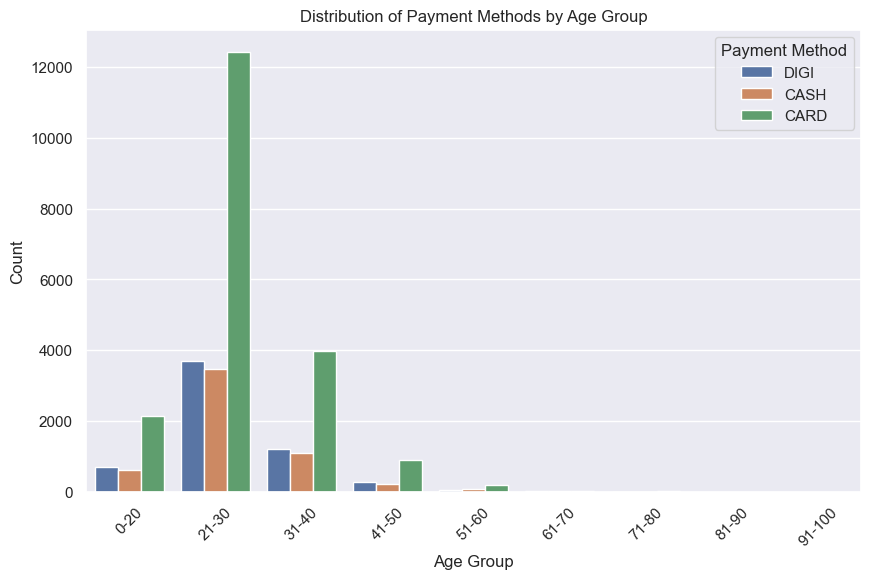

In [ ]:
# Create age bins
df['age_group'] = pd.cut(df['customer_age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                         labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

# Plot the count of payment methods by age group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='payment_method')
plt.title('Distribution of Payment Methods by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Payment Method')
plt.xticks(rotation=45)
plt.show()


Remarks:
- Use of Card is always the preferred method, specially in the 21-30 group, whereas it is important to note that for the groups 0-20 and 31-40 also show significant usage of DIGI and CASH payments, even though the card is still the preferred method.

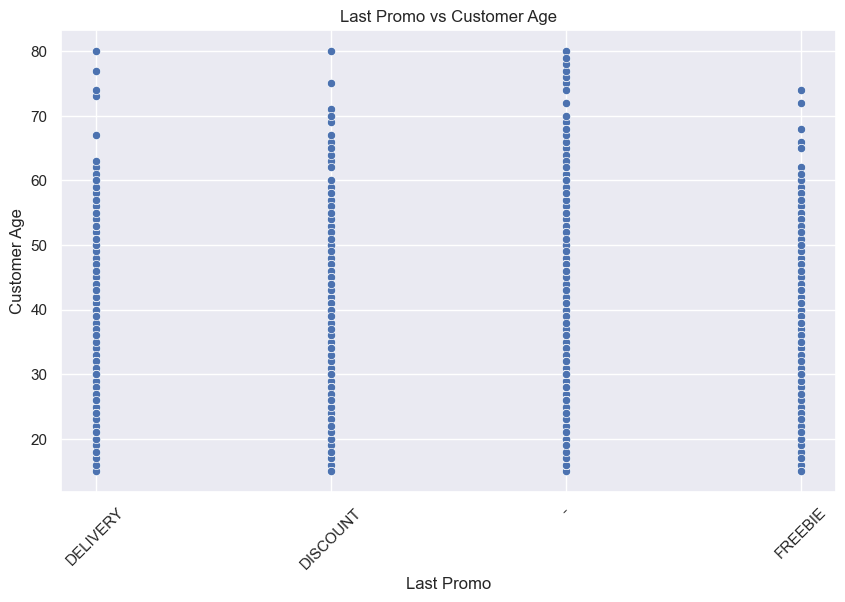

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='last_promo', y='customer_age')
plt.title('Last Promo vs Customer Age')
plt.xlabel('Last Promo')
plt.ylabel('Customer Age')
plt.xticks(rotation=45)
plt.show()

Remarks:
- Customers of all ages are represented across the promotion types, but there is a notable pattern in the "-" category.
- Elderly Presence in "-" Category: The "-" category, which likely indicates that the customer has not used any recent promotion, shows a noticeably higher concentration of elderly customers compared to other promo types like FREEBIE, DISCOUNT, or DELIVERY.
- Promotion Types: Younger customers are more evenly distributed across the DELIVERY, DISCOUNT, and FREEBIE options, while older customers tend to appear more frequently in the "-" group.


-> Customer Age vs. Cuisine Preferences

Understanding if certain age groups have a higher preference for specific cuisines can help ABCDEats target promotions or recommendations

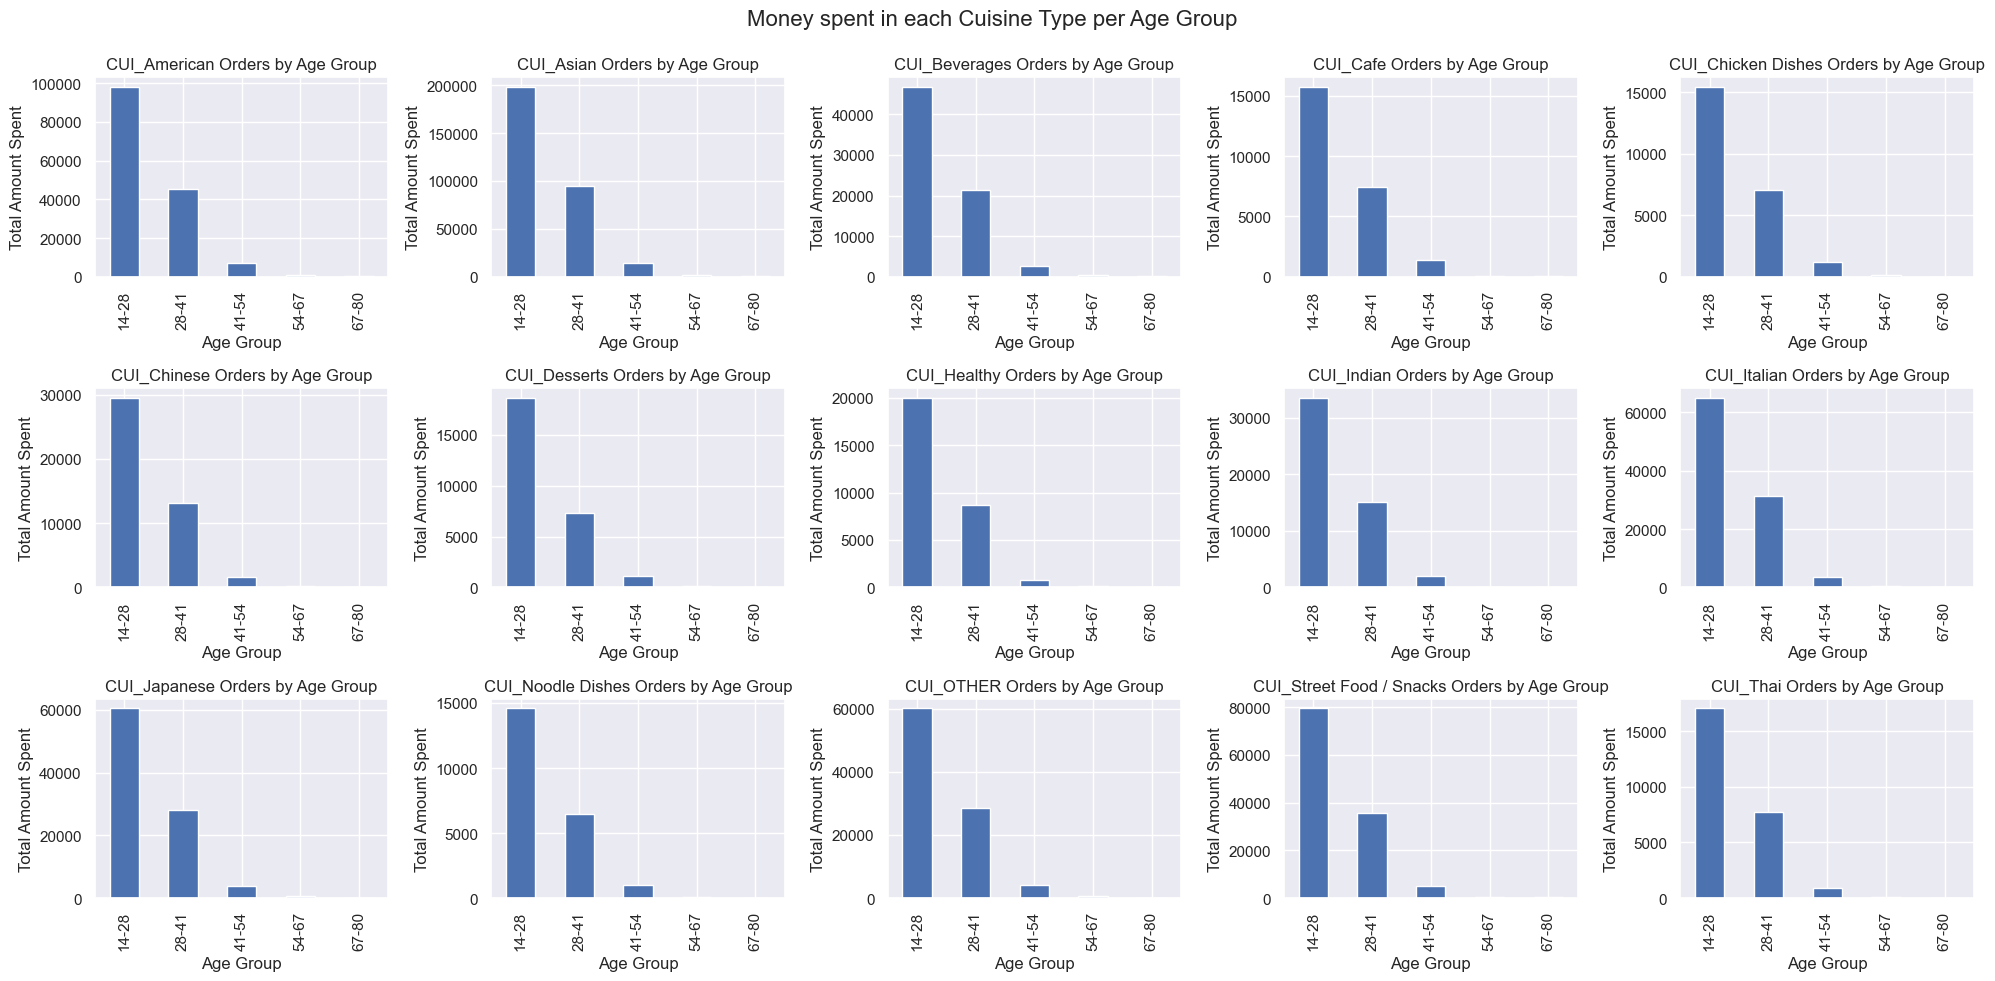

In [ ]:
warnings.filterwarnings('ignore')

age_bins = pd.cut(df['customer_age'], bins=5)
age_bins = age_bins.apply(lambda x: f"{int(x.left)}-{int(x.right)}")
cuisine_types = amount_spent_per_cuisine.columns

fig, axes = plt.subplots(3, 5, figsize=(20, 10))

for ax, cuisine in zip(axes.flatten(), cuisine_types):
    orders_per_age_group = amount_spent_per_cuisine.groupby(age_bins)[cuisine].sum()
    orders_per_age_group.plot(kind='bar', ax=ax)
    ax.set_title(f'{cuisine} Orders by Age Group')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Total Amount Spent')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the main title
plt.suptitle('Money spent in each Cuisine Type per Age Group', fontsize=16)
plt.show()


Remarks: 
- The distribution is similar for all cuisine types
- Age group 14-28 spent more money than the others with a significant margin for all cuisine types
- The cuisine types with highest spending are Asian and American

-> Order Frequency based on their activity period


In [31]:
# remove non_orderes for this analysis
df_customers = df[~df.index.isin(no_orders.index)]

In [32]:
days_active = df_customers['last_order'] - df_customers['first_order'] # days active
sum_orders = df_customers.loc[:, 'DOW_0':'DOW_6'].sum(axis=1) # number of orders
order_freq = sum_orders / days_active.replace(0, pd.NA) # average number of orders per day for each customer

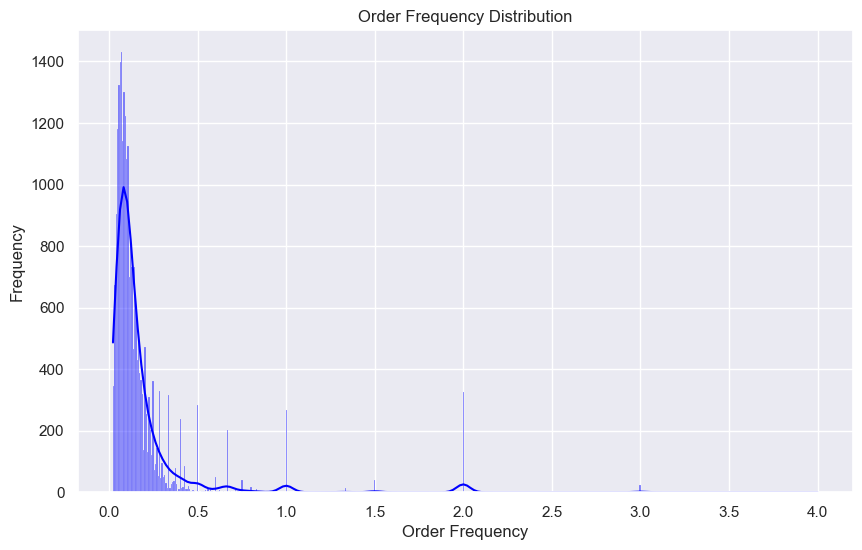

In [ ]:
# plot the distribution of order frequency
plt.figure(figsize=(10, 6))
sns.histplot(order_freq.dropna(), kde=True, color='blue')
plt.title('Order Frequency Distribution')
plt.xlabel('Order Frequency')
plt.ylabel('Frequency')
plt.show()

Remarks: 
- Most customers place orders infrequently (close to 0)
- High concentration of customers with frequencies under 0.5, meaning that most customers, on average, place orders less than once every two days.
- Few customers order more frequently (with frequencies approaching 1 or higher)
- The occasional spikes above 1.0 and 2.0 likely represent very active customers who place multiple orders per day (power customers)

# Customer Groups 

In [ ]:
# GROUP THAT DIDN'T ORDER DURING THE PERIOD
df[df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) == 0].describe()

#lower than average age 
#lower than average is_chain
#there are, unexpectedly, 75 non null values for is_chain in this group - wrong value(?)

#for last_promo, the group has a higher tendency to use promotions than the whole dataset (while 53% of the overall customers never used any promotion, only 37% of this group never used any) - IS THIS BECAUSE CUSTOMERS IN THIS GROUP DON'T HAVE A TENDENCY TO ORDER FOOD AND ONLY DO WHEN THEY HAVE A PROMOTION? MAYBE, ELABORATE ON THIS
#still for last_promo, customers in this group use more delivery and discount promotions than the whole dataset (34% against 20% and 20% against 14% respectively), but less freebies (9% against 14%)
#for payment_method, the group doesn't show such a clear favoritism for card as the whole dataset does(39% against 63%); cash and digi are more used in this group in comparison to the whole dataset (33% against 17% and 28% against 19% respectively)
#for customer_region, 100% of the customers in this group come from region 8

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,138.000000,138.0,138.0,138.000000,138.000000,138.000000,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0
mean,27.065217,0.0,0.0,0.543478,44.659420,44.659420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,6.951560,0.0,0.0,0.499921,25.934645,25.934645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,17.000000,0.0,0.0,0.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,22.000000,0.0,0.0,0.000000,22.250000,22.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,26.000000,0.0,0.0,1.000000,44.000000,44.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,30.000000,0.0,0.0,1.000000,66.750000,66.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,55.000000,0.0,0.0,1.000000,89.000000,89.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(f"Region 2: {round(df[(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) == 0) & ((df['customer_region'] == '2360') | (df['customer_region'] == '2440') | (df['customer_region'] == '2490'))]['customer_region'].value_counts().sum()/df[df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) == 0]['customer_region'].value_counts().sum()*100,2)}%")
print(f"Region 4: {round(df[(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) == 0) & ((df['customer_region'] == '4660') |  (df['customer_region'] == '4140'))]['customer_region'].value_counts().sum()/df[df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) == 0]['customer_region'].value_counts().sum()*100,2)}%")
print(f"Region 8: {round(df[(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) == 0) & ((df['customer_region'] == '8670') |  (df['customer_region'] == '8370') | (df['customer_region'] == '8550'))]['customer_region'].value_counts().sum()/df[df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) == 0]['customer_region'].value_counts().sum()*100,2)}%")

Region 2: 0.0%
Region 4: 0.0%
Region 8: 100.0%


In [ ]:
#GROUP THAT ORDERED THE MOST DURING THE PERIOD
#top 10% values of the product count

percentile_90 = df['product_count'].quantile(0.9)

df[df['product_count'] >= percentile_90].describe()

#slightly higher than average age
#higher than average vendor count - enjoys variety
#higher than average consumers of chain restaurants
#as expected, has a smaller than average gap between orders
#show a huge preference for Asian cuisine, followed by the second favorite - American (with half the average spending); honerable mention to Other, Street Food/Snacks and Italian
#constant consumption throughout the week, with all days having average orders in the house of 2,...; There seems to be a trend, form sunday to saturday, of increasing consumption, with the only exception being a slight decrease on friday
#extremely similar distribution of orders per hour of the day to the whole dataset (although stonger at 11am)

# last_promo: shares the most common value with the whole dataset ('-'), but the other values are inverted(from most to least common, we have_ freebie, discount, delivery) - there are more customers not using promos (66% against 53%), and, as a result, the percentages of customers using each type of promo are lower than in the whole dataset
# customer_region: while the percentage of customers from region 4 seem to be consistent with the whole dataset, it is interesting to note that region 2 customers represent 44% of customers in this group, while they only represent 33% of the whole dataset; on the other hand, region 8 customers represent 22% of customers in this group, while they represent 32% of the whole dataset
# payment_method: there is a higher tendency to use card (75% of customers in this group use card against only 63% in the whole dataset), and a lower tendency to use cash (11% of customers in this group use cash against 18% in the whole dataset)

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,3475.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3243.0,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000,3564.000000
mean,27.623885,8.399832,20.391975,9.852413,9.048822,81.803591,14.159776,28.926641,6.177062,4.191728,2.820219,6.114543,2.582407,3.314405,5.497096,10.195811,9.459708,2.993488,11.901305,10.964781,2.926299,2.000842,2.084736,2.128507,2.203984,2.243827,2.047419,2.272447,0.0,0.159091,0.178171,0.244669,0.243547,0.188833,0.180976,0.248036,0.501684,0.859708,1.216611,1.364759,1.167508,0.841751,0.740180,0.924804,1.149270,1.320988,1.226712,0.945847,0.545455,0.245230,0.170875,0.158530
std,7.170259,4.336701,11.655565,7.719805,11.373528,9.374554,23.792813,52.003475,16.867094,17.313431,8.663703,21.447319,11.395622,13.685530,17.032212,26.092377,22.933639,11.248957,22.565934,33.300102,9.870892,1.852928,1.933820,1.879408,1.896768,1.897981,1.927466,2.133915,0.0,0.651602,0.736724,0.858931,0.846747,0.622777,0.620600,0.841783,1.605753,1.600752,1.957504,2.088003,1.825614,1.288646,1.213338,1.540350,1.786263,1.960513,1.950756,1.821886,1.369615,0.737449,0.652923,0.619958
min,15.000000,1.000000,12.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,6.000000,14.000000,5.000000,2.000000,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,8.000000,17.000000,9.000000,5.000000,85.000000,5.140000,5.945000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.110000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,10.000000,23.000000,13.000000,12.000000,88.000000,18.077500,36.512500,4.890000,0.000000,1.122500,4.080000,0.000000,0.000000,0.000000,7.005000,11.337500,0.000000,15.395000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,72.000000,41.000000,269.000000,83.000000,84.000000,90.000000,280.210000,896.7

In [ ]:
#is_chain mean in relation to the weekly orders mean - does this add something? the difference is not huge 

print(f"Whole dataset: {2.819467/((df.loc[:,'DOW_0':'DOW_6'].sum()/31828).mean())}")
print(f"Group that ordered the most: {9.852413/((df.loc[(df['product_count'] >= percentile_90), 'DOW_0':'DOW_6' ].sum()/3564).mean())}")

Whole dataset: 4.5174246676255265
Group that ordered the most: 4.603389821593782


In [ ]:
#group that ordered the most during the period by region
print(f"Region 2: {round(df[(df['product_count'] >= percentile_90) & ((df['customer_region'] == '2360') | (df['customer_region'] == '2440') | (df['customer_region'] == '2490'))]['customer_region'].value_counts().sum()/df[df['product_count'] >= percentile_90]['customer_region'].value_counts().sum()*100,2)}%")
print(f"Region 4: {round(df[(df['product_count'] >= percentile_90) & ((df['customer_region'] == '4660') |  (df['customer_region'] == '4140'))]['customer_region'].value_counts().sum()/df[df['product_count'] >= percentile_90]['customer_region'].value_counts().sum()*100,2)}%")
print(f"Region 8: {round(df[(df['product_count'] >= percentile_90) & ((df['customer_region'] == '8670') |  (df['customer_region'] == '8370') | (df['customer_region'] == '8550'))]['customer_region'].value_counts().sum()/df[df['product_count'] >= percentile_90]['customer_region'].value_counts().sum()*100,2)}%")

Region 2: 44.11%
Region 4: 32.6%
Region 8: 22.36%


In [ ]:
#GROUP THAT ORDERED THE LEAST DURING THE PERIOD
#bottom 10% values of the product count

percentile_10 = df[df['first_order'].notna()]['product_count'].quantile(0.1)

df[(df['product_count'] <= percentile_10)&(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0)].describe()

#extremely close to the average age
#invariate vendour_count - all values equal 1; thus the mean is 1, and lower than the whole dataset average
#0 is the minimum value for product_count, which is not expected as this group placed, at least, 1 order during the period 
#lower than average consumption of chain restaurants
#tendency to only order once is showed by the close mean values of first and last order
#as in the whole dataset, the most spending is done in Asian cuisine, followed by American; They are not as keen on Other as the general customer, but they show a high preference for Italian and Japanese Cuisine
#contrary to the dataset trend, the average number of orders per day of the week actually decreases from Sunday to Tuesday, where it begins the increase, peaking on Friday (more similar to general trend) with a slight decrease on Saturday
#similar distribution to the whole dataset of orders per hour of the day

#last_promo: similarly to the group that didn't order during the period, customers show a higher tendency to using discounts ('-': 34% non users against 53%); by comparing the other promos, we get: delivery - 35% to 20%; discount - 20% to 14% and freebie - 12% to 14% (same conclusion as in the first group might be taken)
#payment_method: again, very similar to the group that didn't order during the period, there is a lower tendency to use card (42% against 63%), a higher tendency to use cash (35% against 18%) and digi (24% against 19%)
#customer_region: even thought the percentages are similar (all in the house of 30 something %), most customers come from region 4, followed by region 2 and 8

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,4602.000000,4705.0,4705.000000,4705.000000,4626.000000,4705.00000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4655.0,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000,4705.000000
mean,27.512821,1.0,0.996174,0.624655,46.680502,45.97577,1.386842,2.512918,0.653458,0.101911,0.161496,0.237012,0.288589,0.229443,0.490929,1.040230,0.902910,0.097211,0.583679,0.576414,0.176043,0.113284,0.112646,0.110521,0.124761,0.168757,0.185760,0.184272,0.0,0.015090,0.013603,0.032731,0.033581,0.025505,0.022104,0.020191,0.029118,0.047396,0.066312,0.079065,0.061424,0.046971,0.045484,0.072901,0.082465,0.099256,0.080340,0.048884,0.031031,0.014453,0.012965,0.008502
std,7.231355,0.0,0.061741,0.484263,26.064551,26.56280,3.856367,5.644415,2.778831,1.033385,1.024484,1.602203,2.022347,1.722064,2.438785,3.256959,3.363166,0.769122,2.282301,2.910169,1.216586,0.316973,0.316193,0.313571,0.330483,0.374577,0.388954,0.387747,0.0,0.121925,0.115846,0.177951,0.180168,0.157669,0.147038,0.140669,0.168155,0.212508,0.248854,0.269869,0.240132,0.211600,0.208384,0.260002,0.275102,0.299037,0.271848,0.215649,0.173419,0.119360,0.113135,0.091821
min,15.000000,1.0,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1.0,1.000000,0.000000,24.000000,22.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,1.0,1.000000,1.000000,48.000000,47.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,1.0,1.000000,1.000000,69.000000,69.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,77.000000,1.0,1.000000,1.000000,90.000000,90.00000,24.390000,22.760000,19.800000,16.630000,19.610000,19.440000,20.130000,20.590000,24.110000,22.17

In [ ]:
#is_chain mean in relation to the weekly orders mean - does this add something? the difference is not huge 

print(f"Whole dataset: {2.819467/((df.loc[:,'DOW_0':'DOW_6'].sum()/31828).mean())}")
print(f"Group that ordered the least: {0.624655/((df.loc[(df['product_count'] <= percentile_10)&(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0), 'DOW_0':'DOW_6' ].sum()/4705).mean())}")

Whole dataset: 4.5174246676255265
Group that ordered the least: 4.372585


In [ ]:
print(f"Region 2: {round(df[(df['product_count'] <= percentile_10)&(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0) & ((df['customer_region'] == '2360') | (df['customer_region'] == '2440') | (df['customer_region'] == '2490'))]['customer_region'].value_counts().sum()/df[(df['product_count'] <= percentile_10)&(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0)]['customer_region'].value_counts().sum()*100,2)}%")
print(f"Region 4: {round(df[(df['product_count'] <= percentile_10)&(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0) & ((df['customer_region'] == '4660') |  (df['customer_region'] == '4140'))]['customer_region'].value_counts().sum()/df[(df['product_count'] <= percentile_10)&(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0)]['customer_region'].value_counts().sum()*100,2)}%")
print(f"Region 8: {round(df[(df['product_count'] <= percentile_10)&(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0) & ((df['customer_region'] == '8670') |  (df['customer_region'] == '8370') | (df['customer_region'] == '8550'))]['customer_region'].value_counts().sum()/df[(df['product_count'] <= percentile_10)&(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0)]['customer_region'].value_counts().sum()*100,2)}%")

Region 2: 31.16%
Region 4: 35.96%
Region 8: 30.99%


In [ ]:
print(df[(df['product_count'] <= percentile_10)&(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0)]['payment_method'].value_counts())
print(df[(df['product_count'] <= percentile_10)&(df.loc[:,'DOW_0':'DOW_6'].sum(axis=1) != 0)]['payment_method'].value_counts().sum())

print(1966/4705*100)
print(1624/4705*100)
print(1115/4705*100)

payment_method
CARD    1966
CASH    1624
DIGI    1115
Name: count, dtype: int64
4705
41.785334750265676
34.51647183846971
23.69819341126461


In [ ]:
###################### Group with first_order NaN - can this be useful?
df[df['first_order'].isna()]

#higher than average age 
#lower than average vendor count
#lower than average product count 
#lower than average is_chain
#prefers to consume at 12pm, followed by 11am; rarely consumes after 6pm and before 9am
#only consumes on Saturday - is there missing values or is this a pattern? explore both ideas

#for last_promo, the group has a higher tendency to use promotions than the whole dataset (while 53% of the overall customers never used any promotion, only 36% of this group never used any) - IS THIS BECAUSE CUSTOMERS IN THIS GROUP DON'T HAVE A TENDENCY TO ORDER FOOD AND ONLY DO WHEN THEY HAVE A PROMOTION? MAYBE, ELABORATE ON THIS
#still for last_promo, customers in this group use more delivery and discount promotions than the whole dataset (35% against 20% and 21% against 14% respectively), but less freebies (10% against 14%)
#for payment_method, the group doesn't show such a clear favoritism for card as the whole dataset does(42% against 63%); cash and digi are more used in this group in comparison to the whole dataset (36% against 17% and 23% against 19% respectively)
#for customer_region, region 8 customers represent almost half of the group that stopped ordering (45%); both region 2 and 4 have similar percentages of customers in the group (26% and 25% respectively), which remains consistent with the whole dataset, where they also have similar percentages